# PHẦN 2: KHÁM PHÁ DỮ LIỆU

&#9889; **Bảng phân công nhóm**:

|Họ và tên|MSSV|Phân công| 
|-----|-------|------| 
|Phan Minh Triết|19120039|Khám phá file "Users.csv", "Playlists.csv"| 
|Trần Đức Thuỵ|19120138|Khám phá file "Tracks.csv", "Playlists.csv"|

[LINK ĐẾN THÙNG CHỨA GITHUB](https://github.com/19120039/DACK_LTKHDL)

 ##  Đặt vấn đề:

- Một công ty phân phối âm nhạc Spotify đang phủ sóng khắp cả toàn cầu, được giới chuyên môn và người dùng đánh giá rất tích cực. Đây là công ty, doanh nghiệp phát triển ứng dụng tên Spotify phục vụ nhu cầu phân phối các bài hát nổi tiếng bởi những người dùng User và có trả phí để mở thêm nhiều tính năng tiện lợi hơn. Đội ngũ của họ là những người sáng tạo, phân tích dữ liệu người dùng. Một hôm với chiến lược bành trướng, theo sự chỉ đạo của đội ngũ phân tích dữ liệu, các nhân viên bắt đầu "do thám" trang web âm nhạc lớn - SoundCloud là một trang web, ứng dụng cho những người dùng cover âm nhạc tương tác với nhau bằng cách lấy những dữ liệu "Users", "Tracks", "Playlists" để phân tích. 
- Vấn đề được đặt ra: Ta sẽ đào sâu về những dữ liệu này và biết được những thông tin về người dùng truy cập, lượng track qua các năm cho đến những playlists, qua đó có thể áp dụng vào chiến lược phát triển của công ty.

Vấn đề đã có, giờ ta bắt đầu tìm hiểu thôi nào !

## Thư viện sử dụng:

In [1]:
import matplotlib.pyplot as plt
import pandas as pd 
import numpy as np
from datetime import datetime

## Khám phá dữ liệu:

### Phần 1: Dữ liệu Users

#### Khám phá chi tiết những dữ liệu biết nói:

**1.1. Dữ liệu có bao nhiêu dòng và bao nhiêu cột?**

In [2]:
# Đọc file Users.csv
filename = 'Users.csv' 
user_df = pd.read_csv(filename, header = 0, encoding = 'utf-8')
user_df

,username,full_name,id,city,country_code,followers_count,permalink_url,avatar_url,verified,last_modified,kind
0,Assala,Assala Nasri,102433987,NaN,NaN,353686,https://soundcloud.com/assalaofficial,https://i1.sndcdn.com/avatars-000459010359-q41...,True,2021-10-03T00:00:01Z,user
1,Levi Patel,Levi Patel,1776079,Auckland,NZ,13476,https://soundcloud.com/levipatel,https://i1.sndcdn.com/avatars-000660682205-k0g...,False,2020-02-25T06:26:57Z,user
2,Alice Baldwin,NaN,93750493,Berlin,NaN,4441,https://soundcloud.com/alice_baldwin,https://i1.sndcdn.com/avatars-LcqLIYPOHpKctU5z...,False,2021-09-13T10:49:41Z,user
3,Simeon Walker,"Leeds, UK",130872163,Pianist & Composer,NaN,4944,https://soundcloud.com/simeonwalkermusic,https://i1.sndcdn.com/avatars-gvVb4EzELDpbBFdx...,False,2021-10-29T07:16:23Z,user
4,Serein,NaN,1871,NaN,GB,8044,https://soundcloud.com/serein,https://i1.sndcdn.com/avatars-000154943922-qzz...,True,2021-10-04T15:26:43Z,user
...,...,...,...,...,...,...,...,...,...,...,...
1308,Alessia Cara,Alessia Cara,296514710,NaN,NaN,73949,https://soundcloud.com/alessiacara,https://i1.sndcdn.com/avatars-nzmyyEKgsE0lHqnb...,True,2021-09-24T04:05:57Z,user
1309,Alessia Cara,Alessia Cara,296514710,NaN,NaN,73949,https://soundcloud.com/alessiacara,https://i1.sndcdn.com/avatars-nzmyyEKgsE0lHqnb...,True,2021-09-24T04:05:57Z,user
1310,Alessia Cara,Alessia Cara,296514710,NaN,NaN,73949,https://soundcloud.com/alessiacara,https://i1.sndcdn.com/avatars-nzmyyEKgsE0lHqnb...,True,2021-09-24T04:05:57Z,user
1311,Alessia Cara,Alessia Cara,296514710,NaN,NaN,73949,https://soundcloud.com/alessiacara,https://i1.sndcdn.com/avatars-nzmyyEKgsE0lHqnb...,True,2021-09-24T04:05:57Z,user


In [3]:
num_rows = len(user_df.index)
num_cols = len(user_df.columns)
print(num_rows, num_cols)

1313 11


***Như vậy dữ liệu User có 1313 dòng và 11 cột.***

**1.2. Dữ liệu mỗi cột có bị lặp không?**

In [4]:
count_duplicated = user_df.duplicated(keep = False).sum()
print(count_duplicated)

831


Như ta đã thấy có khá nhiều dữ liệu bị trùng. Như vậy ta sẽ xoá bớt những dữ liệu bị trùng và những cột không cần thiết.

In [5]:
user_df = user_df.drop_duplicates()
user_df = user_df.drop(['country_code','kind', 'verified'], axis = 1)
user_df

,username,full_name,id,city,followers_count,permalink_url,avatar_url,last_modified
0,Assala,Assala Nasri,102433987,NaN,353686,https://soundcloud.com/assalaofficial,https://i1.sndcdn.com/avatars-000459010359-q41...,2021-10-03T00:00:01Z
1,Levi Patel,Levi Patel,1776079,Auckland,13476,https://soundcloud.com/levipatel,https://i1.sndcdn.com/avatars-000660682205-k0g...,2020-02-25T06:26:57Z
2,Alice Baldwin,NaN,93750493,Berlin,4441,https://soundcloud.com/alice_baldwin,https://i1.sndcdn.com/avatars-LcqLIYPOHpKctU5z...,2021-09-13T10:49:41Z
3,Simeon Walker,"Leeds, UK",130872163,Pianist & Composer,4944,https://soundcloud.com/simeonwalkermusic,https://i1.sndcdn.com/avatars-gvVb4EzELDpbBFdx...,2021-10-29T07:16:23Z
4,Serein,NaN,1871,NaN,8044,https://soundcloud.com/serein,https://i1.sndcdn.com/avatars-000154943922-qzz...,2021-10-04T15:26:43Z
...,...,...,...,...,...,...,...,...
1297,shnaebidy,NaN,46747904,Scotland,1786,https://soundcloud.com/be-ady-eye,https://i1.sndcdn.com/avatars-000451405896-kvr...,2018-05-31T14:02:49Z
1298,Ed Sheeran,Ed Sheeran,3685019,NaN,2369964,https://soundcloud.com/edsheeran,https://i1.sndcdn.com/avatars-KRxzijkzJ63MipoA...,2021-10-28T23:05:42Z
1299,Tylerinacoma,TYLER GLENN,6455125,U/S/A/,1600,https://soundcloud.com/tylerinacoma,https://i1.sndcdn.com/avatars-000029015425-alt...,2012-12-20T05:20:13Z
1300,ADDAL,NaN,9969027,Milan,122529,https://soundcloud.com/addal,https://i1.sndcdn.com/avatars-000696909823-v6l...,2021-09-27T18:45:37Z


**1.3. Dữ liệu nói lên điều gì?**

Ta bắt đầu tìm hiểu từng cột, qua các tên cột và dữ liệu của nó, ta thấy rằng:
- `username`: Tên người dùng user
- `full_name`: Họ và tên đầy đủ của người dùng
- `id`: ID của User
- `city`: Thành phố nơi User sống
- `followers_count`: Số lượng người theo dõi User này
- `permalink_url`: Link dẫn đến trang cá nhân của họ
- `avatar_url`: Link hình ảnh avatar của User
- `last_modified`: Thời điểm lần cuối User hoạt động chỉnh sửa

Ta sẽ tìm hiểu từng cột mang kiểu dữ liệu gì.

In [6]:
col_dtypes = user_df.dtypes
col_dtypes

username           object
full_name          object
id                  int64
city               object
followers_count     int64
permalink_url      object
avatar_url         object
last_modified      object
dtype: object

Các nhân viên phân tích dữ liệu sẽ quan tâm gì đến trong bảng này?
Thì ta giả định rằng để phân phối sản phẩm theo từng quốc gia, họ sẽ quan tâm đến các cột: `city`, `follower_count`

Có vẻ như ở cột `last_modified` đáng lẽ phải có kiểu dữ liệu 'datetime' nhưng vấn đề ta cần khám phá ở dataset này không sử dụng cột này, ta sẽ bỏ nó đi.

Ta sẽ vẽ biểu đồ ở 2 cột này. Do số lượng dữ liệu khá nhiều > 500 nên ta sẽ chỉ vẽ biểu đồ tỉ lệ phần trăm với mỗi Quốc gia trong 10 Quốc gia (`city`) mà User xuất thân nhiều nhất.

**1.3.a) Cột `City`:**

In [7]:
# Tiền xử lý cột city:
user_df['city'] = user_df['city'].str.lower()
temp = user_df
a = user_df['city'].dropna()
# Ta sẽ lấy 10 nước có số lượng Users nhiều nhất
most_city_user_come_from = a.value_counts().nlargest(10)
most_city_user_come_from = (most_city_user_come_from / most_city_user_come_from.sum()) * 100

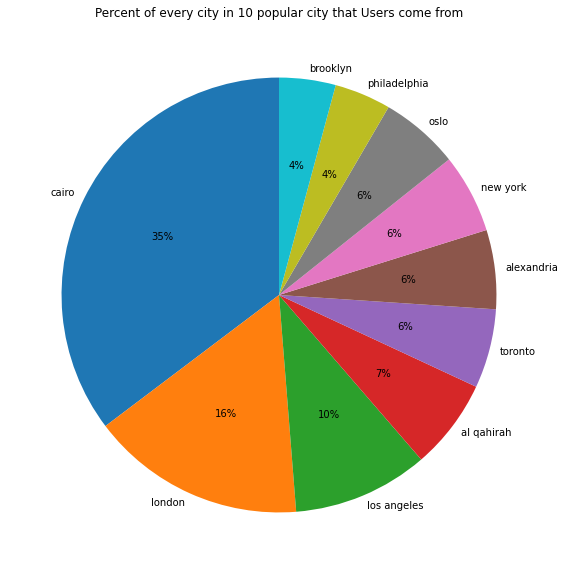

In [8]:
# Visualize cột city:
f = plt.figure()
f.set_figwidth(10)
f.set_figheight(10)
plt.title('Percent of every city in 10 popular city that Users come from')
plt.pie(most_city_user_come_from, labels =  most_city_user_come_from.keys(), startangle = 90, 
        autopct='%1.0f%%', pctdistance=0.6, labeldistance=1.05)
plt.show()

*1.3.b) Cột `Followes_count`:*

<AxesSubplot:title={'center':'Followers Each User'}, xlabel='username'>

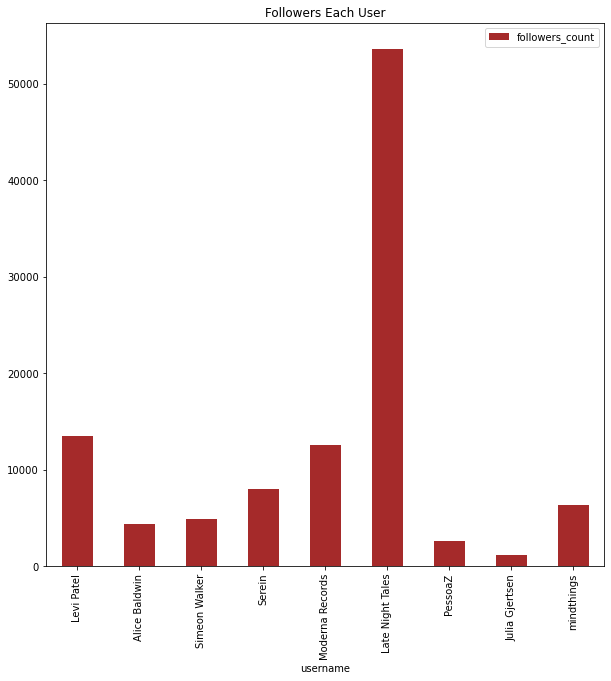

In [9]:
# Ở cột Follower_count
# Lấy 10 dữ liệu đầu tiên
a = user_df[1:10]
a.plot(x = 'username', y = 'followers_count', kind = 'bar', figsize = (10,10), title = 'Followers Each User', color='brown')

**Kết luận**: Phân tích viên có thể dựa vào biều đồ trên để đánh giá người dùng rằng:
- Những người dùng từ những quốc gia nào, phần lớn họ ở 1 quốc gia hay nhiều quốc gia, chủ yếu ở châu lục nào trên thế giới
- Những lượt theo dõi từ những người dùng cho thấy người dùng đang quan tâm về những người dùng post âm nhạc gì, quốc gia nào...

### Phần 2: Dữ liệu Tracks

#### Khám phá chi tiết những dữ liệu biết nói:

**2.1. Dữ liệu có bao nhiêu dòng và bao nhiêu cột?**

In [10]:
track_df = pd.read_csv("tracks.csv", encoding = "utf-8")
track_df

,title,id,genre,caption,description,permalink_url,download_count,last_modified,artwork_url,created_at,track_format,kind
0,Ya A'alem | أصالة - يا عالم,338894518,NaN,NaN,يا عالم هشوفه ولو صدفة يوم.. لابيجيلي نوم ..\n...,https://soundcloud.com/assalaofficial/yaaalem,0.0,2021-10-30T12:18:38Z,https://i1.sndcdn.com/artworks-000239422855-ug...,2017-08-21T22:39:30Z,single-track,track
1,As she passes,191576787,Piano,NaN,I took some time away to write a short collect...,https://soundcloud.com/levipatel/as-she-passes,0.0,2021-09-19T16:33:04Z,https://i1.sndcdn.com/artworks-000107020657-dc...,2015-02-17T12:24:09Z,single-track,track
2,Was am Ende,237941720,Classical Crossover,NaN,Für Lena † 2011\n___\n\nher short life ended s...,https://soundcloud.com/alice_baldwin/was-am-ende,0.0,2021-07-26T20:14:50Z,https://i1.sndcdn.com/artworks-fJzCiYUdpj5i-0-...,2015-12-17T07:26:37Z,single-track,track
3,January,199486709,Piano,NaN,Watch the video here:\n\nhttps://www.youtube.c...,https://soundcloud.com/simeonwalkermusic/january,0.0,2021-10-31T13:45:23Z,https://i1.sndcdn.com/artworks-000112483597-1v...,2015-04-06T11:37:10Z,single-track,track
4,To Speak Of Solitude,59702269,Ambient,NaN,Full stream and free download of the opening t...,https://soundcloud.com/serein/to-speak-of-soli...,10422.0,2021-10-15T00:49:41Z,https://i1.sndcdn.com/artworks-000351225852-yj...,2012-09-13T10:32:06Z,single-track,track
...,...,...,...,...,...,...,...,...,...,...,...,...
1308,Rooting For You (Live Off The Floor),855361237,Pop,NaN,NaN,https://soundcloud.com/alessiacara/rooting-for...,0.0,2021-10-07T23:47:50Z,https://i1.sndcdn.com/artworks-g79adAl1WhP0-0-...,2020-07-10T03:19:22Z,single-track,track
1309,October (Live Off The Floor),855361597,Pop,NaN,NaN,https://soundcloud.com/alessiacara/october-liv...,0.0,2021-10-07T23:48:12Z,https://i1.sndcdn.com/artworks-Yzi8Tz7pcjXN-0-...,2020-07-10T03:19:48Z,single-track,track
1310,Scars To Your Beautiful (Live Off The Floor (B...,855361777,Pop,NaN,NaN,https://soundcloud.com/alessiacara/scars-to-yo...,0.0,2021-10-07T23:45:28Z,https://i1.sndcdn.com/artworks-K6ZreVz1fHhL-0-...,2020-07-10T03:20:01Z,single-track,track
1311,Here (Live Off The Floor (Bonus Track)),855361327,Pop,NaN,NaN,https://soundcloud.com/alessiacara/here-live-o...,0.0,2021-10-07T23:49:23Z,https://i1.sndcdn.com/artworks-hBX74Rqgya8S-0-...,2020-07-10T03:19:29Z,single-track,track


In [11]:
num_rows = len(track_df.index)
num_cols = len(track_df.columns)
print(num_rows, num_cols)

1313 12


***Như vậy dữ liệu Track có 1313 dòng và 12 cột.***

**2.2. Dữ liệu mỗi cột có bị lặp không?**

In [12]:
count_duplicated = track_df.duplicated(keep = False).sum()
print(count_duplicated)

566


Như ta đã thấy có khá nhiều dữ liệu bị trùng. Như vậy ta sẽ xoá bớt những dữ liệu bị trùng và những cột không cần thiết.

In [13]:
track_df = track_df.drop_duplicates()
track_df = track_df.drop(["caption", "description", "kind", "track_format"], axis = 1)
track_df

,title,id,genre,permalink_url,download_count,last_modified,artwork_url,created_at
0,Ya A'alem | أصالة - يا عالم,338894518,NaN,https://soundcloud.com/assalaofficial/yaaalem,0.0,2021-10-30T12:18:38Z,https://i1.sndcdn.com/artworks-000239422855-ug...,2017-08-21T22:39:30Z
1,As she passes,191576787,Piano,https://soundcloud.com/levipatel/as-she-passes,0.0,2021-09-19T16:33:04Z,https://i1.sndcdn.com/artworks-000107020657-dc...,2015-02-17T12:24:09Z
2,Was am Ende,237941720,Classical Crossover,https://soundcloud.com/alice_baldwin/was-am-ende,0.0,2021-07-26T20:14:50Z,https://i1.sndcdn.com/artworks-fJzCiYUdpj5i-0-...,2015-12-17T07:26:37Z
3,January,199486709,Piano,https://soundcloud.com/simeonwalkermusic/january,0.0,2021-10-31T13:45:23Z,https://i1.sndcdn.com/artworks-000112483597-1v...,2015-04-06T11:37:10Z
4,To Speak Of Solitude,59702269,Ambient,https://soundcloud.com/serein/to-speak-of-soli...,10422.0,2021-10-15T00:49:41Z,https://i1.sndcdn.com/artworks-000351225852-yj...,2012-09-13T10:32:06Z
...,...,...,...,...,...,...,...,...
1308,Rooting For You (Live Off The Floor),855361237,Pop,https://soundcloud.com/alessiacara/rooting-for...,0.0,2021-10-07T23:47:50Z,https://i1.sndcdn.com/artworks-g79adAl1WhP0-0-...,2020-07-10T03:19:22Z
1309,October (Live Off The Floor),855361597,Pop,https://soundcloud.com/alessiacara/october-liv...,0.0,2021-10-07T23:48:12Z,https://i1.sndcdn.com/artworks-Yzi8Tz7pcjXN-0-...,2020-07-10T03:19:48Z
1310,Scars To Your Beautiful (Live Off The Floor (B...,855361777,Pop,https://soundcloud.com/alessiacara/scars-to-yo...,0.0,2021-10-07T23:45:28Z,https://i1.sndcdn.com/artworks-K6ZreVz1fHhL-0-...,2020-07-10T03:20:01Z
1311,Here (Live Off The Floor (Bonus Track)),855361327,Pop,https://soundcloud.com/alessiacara/here-live-o...,0.0,2021-10-07T23:49:23Z,https://i1.sndcdn.com/artworks-hBX74Rqgya8S-0-...,2020-07-10T03:19:29Z


**2.3. Dữ liệu nói lên điều gì?**

Ta bắt đầu tìm hiểu từng cột, qua các tên cột và dữ liệu của nó, ta thấy rằng:
- `title`: Tên của Track
- `id`: ID của Track
- `genre`: Thể loại Track
- `permalink_url`: Link dẫn đến Track
- `avatar_url`: Link hình ảnh avatar của User
- `download_count`: Số lượng người dùng download Track
- `last_modified`: Thời điểm lần cuối User hoạt động chỉnh sửa
- `artwork_url`: Link ảnh minh hoạ của Track
- `created_at`: Ngày Upload Track

Đầu tiên ta sẽ tìm hiểu từng cột mang kiểu dữ liệu gì.

In [14]:
col_dtypes = track_df.dtypes
col_dtypes

title              object
id                  int64
genre              object
permalink_url      object
download_count    float64
last_modified      object
artwork_url        object
created_at         object
dtype: object

Các nhân viên phân tích dữ liệu sẽ quan tâm gì đến trong bảng này?
Thì ta giả định rằng để marketing sản phẩm theo từng quốc gia, họ sẽ quan tâm đến các dữ liệu Track qua từng năm và Thể loại (genre) được yêu thích nhất, gồm các cột: `genre`, `create_at`

Ta thấy rằng: 
- Cột `id` phải được chuyển sang kiểu dữ liệu string
- Cột `last_modified` và `created_at` thành kiểu dữ liệu datetime

Vì thế ta thực hiện các bước tiền xử lý:
- Cột `id` chuyển sang kiểu "string".
- Chuyển 2 cột `last_modified` và `created_at` thành kiểu dữ liệu "datetime".

In [15]:
track_df.id = track_df.id.apply(lambda x: str(x))
a = lambda x: datetime.strptime(x, '%Y-%m-%dT%XZ')
track_df.last_modified = track_df.last_modified.apply(a)
track_df.created_at = track_df.created_at.apply(a)

**2.3.a) Các thể loại phổ biến (chỉ chọn 10 genres) qua từng năm là những thể loại gì?**

In [16]:
# Lấy mẫu dữ liệu
df_1 = track_df.dropna()

#Ta loại bỏ giá trị "this is not the album vì nó là outliers, không giúp ích cho chúng ta kết luận"
df_1 = df_1[df_1["genre"] != "this is not the album"]
genre = df_1.genre
genre_count = genre.value_counts(normalize = True) * 100
genre_top = genre_count.iloc[0:10]

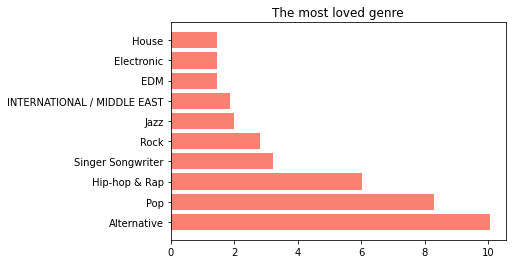

In [17]:
# Visualize Tracks
name = genre_top.keys()
value = genre_top.values
plt.barh(name,value, color = 'salmon')
plt.title("The most loved genre")
plt.yticks(range(len(name)), name)
plt.show()

**2.3.b) Số lượng tracks qua các năm:**

- Phân tích số lượng tracks có thể giúp ta hiểu được số lượng người sử dụng nền tảng qua các năm, xu hướng tăng hay giảm.
- Tập dữ liệu >=1000 items có thể trả lời gần đúng câu hỏi này.

In [18]:
# Tính toán
num_track_of_years = track_df.created_at.apply(lambda x: x.year)
num_track_of_years = num_track_of_years.value_counts()

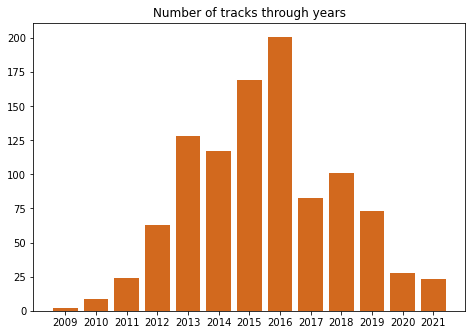

In [19]:
# Vẽ biểu đồ
name = num_track_of_years.keys()
value = num_track_of_years.values
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(name,value, color = 'chocolate')
ax.set_title("Number of tracks through years")
ax.set_xticks(name)
plt.show()

**Kết luận**: Phân tích viên có thể dựa vào biều đồ trên để đánh giá người dùng rằng:
- Từ thể loại Genre được yêu thích nhất ta có thể biết được chiến lược phù hợp, gợi ý những thể loại này cho người dùng.
- Số lượng biến động Track được upload qua các năm cho thấy mạnh mẽ ở 2016 và giảm ở 2021, có thể nhu cầu về âm nhạc ở trên web này đã bị giảm và họ có thể chuyển sang nền tảng, web mới.

### Phần 3: Dữ liệu Playlists

#### Khám phá chi tiết những dữ liệu biết nói:

**3.1. Dữ lệu có bao nhiêu dòng và bao nhiêu cột ?**

In [20]:
# Đọc file playlists.csv
filename = 'playlists.csv' 
playlist_df = pd.read_csv(filename, header = 0, encoding = 'utf-8')
playlist_df

,title,id,genre,description,created_at,permalink_url,user_id,like_count,artwork_url,last_modified,label_name,display_date,duration,reposts_count,kind
0,Acid Jazz,272741983,lofi-jazzflow,: there's no need for stress... & follow us on...,2016-11-03T23:43:30Z,https://soundcloud.com/lordafi/sets/acid-jazz,29407354,387926,https://i1.sndcdn.com/artworks-000692038081-lu...,2021-10-11T07:22:31Z,NaN,2016-11-03T23:43:30Z,5832930,35975,playlist
1,Asala,842244773,NaN,NaN,2019-08-07T21:20:42Z,https://soundcloud.com/nancy-ahmed-156247757/s...,180359510,271,NaN,2019-08-07T21:20:42Z,NaN,2019-08-07T21:20:42Z,247376,13,playlist
2,Ambient piano,192883600,slow piano,Drift away on the ambient waves of the piano\n...,2016-02-04T19:00:30Z,https://soundcloud.com/agamidae/sets/ambient-p...,17971787,142967,https://i1.sndcdn.com/artworks-000151142988-rh...,2016-07-06T15:44:24Z,NaN,2016-02-04T19:00:30Z,3789582,9479,playlist
3,As Beautiful As It Sounds,171923058,beauty,"Magic in sound, perfect ambience, the soundtra...",2015-12-04T10:07:48Z,https://soundcloud.com/user-961145082/sets/as-...,180441394,74516,https://i1.sndcdn.com/artworks-000138365322-zx...,2015-12-04T10:26:05Z,NaN,2015-12-04T10:07:48Z,11360541,4372,playlist
4,ahmed,1100405110,NaN,NaN,2020-07-28T13:44:42Z,https://soundcloud.com/user443908231/sets/ahmed,149191020,0,NaN,2020-12-12T15:09:08Z,NaN,2020-07-28T13:44:42Z,7328169,0,playlist
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1257,Best of - Remixes,1136798191,NaN,NaN,2020-09-29T12:10:26Z,https://soundcloud.com/lucky-yona-jr/sets/best...,76067437,0,NaN,2020-09-29T12:11:31Z,NaN,2020-09-29T12:10:26Z,79227492,0,playlist
1258,BLOOD BROS TRILOGY,520282,Training,"The Blood Bros series, created by Derek 'DJA' ...",2011-01-14T00:28:23Z,https://soundcloud.com/maddecent/sets/blood-br...,14730,1153,https://i1.sndcdn.com/artworks-000004129539-gp...,2012-11-14T01:09:37Z,NaN,2011-01-14T00:28:23Z,7903562,114,playlist
1259,best,117705133,NaN,NaN,2015-06-18T10:56:08Z,https://soundcloud.com/abdo-elafany/sets/best,124394958,0,NaN,2020-12-30T08:19:30Z,NaN,2015-06-18T10:56:08Z,122538222,0,playlist
1260,Best Guy So Far,75852830,NaN,NaN,2015-01-28T01:23:19Z,https://soundcloud.com/aspecialthing/sets/best...,37599594,8,NaN,2015-01-28T01:23:19Z,NaN,2015-01-28T01:23:19Z,1512619,0,playlist


In [21]:
num_rows = len(playlist_df.index)
num_cols = len(playlist_df.columns)
print(num_rows, num_cols)

1262 15


***Như vậy dữ liệu Playlist có 1262 dòng và 15 cột***

**3.2. Dữ liệu mỗi cột có bị lặp không?**

In [22]:
count_duplicated = playlist_df.duplicated(keep = False).sum()
print(count_duplicated)

404


Như ta đã thấy có khá nhiều dữ liệu bị trùng. Như vậy ta sẽ xoá bớt những dữ liệu bị trùng và những cột không cần thiết.

In [23]:
playlist_df = playlist_df.drop_duplicates()
playlist_df = playlist_df.drop(['description', 'label_name', 'display_date', 'kind'], axis = 1)
playlist_df

,title,id,genre,created_at,permalink_url,user_id,like_count,artwork_url,last_modified,duration,reposts_count
0,Acid Jazz,272741983,lofi-jazzflow,2016-11-03T23:43:30Z,https://soundcloud.com/lordafi/sets/acid-jazz,29407354,387926,https://i1.sndcdn.com/artworks-000692038081-lu...,2021-10-11T07:22:31Z,5832930,35975
1,Asala,842244773,NaN,2019-08-07T21:20:42Z,https://soundcloud.com/nancy-ahmed-156247757/s...,180359510,271,NaN,2019-08-07T21:20:42Z,247376,13
2,Ambient piano,192883600,slow piano,2016-02-04T19:00:30Z,https://soundcloud.com/agamidae/sets/ambient-p...,17971787,142967,https://i1.sndcdn.com/artworks-000151142988-rh...,2016-07-06T15:44:24Z,3789582,9479
3,As Beautiful As It Sounds,171923058,beauty,2015-12-04T10:07:48Z,https://soundcloud.com/user-961145082/sets/as-...,180441394,74516,https://i1.sndcdn.com/artworks-000138365322-zx...,2015-12-04T10:26:05Z,11360541,4372
4,ahmed,1100405110,NaN,2020-07-28T13:44:42Z,https://soundcloud.com/user443908231/sets/ahmed,149191020,0,NaN,2020-12-12T15:09:08Z,7328169,0
...,...,...,...,...,...,...,...,...,...,...,...
1253,Best of - Remixes,1158502336,NaN,2020-11-07T21:25:39Z,https://soundcloud.com/user-716608604-49141209...,904267432,0,NaN,2020-11-07T21:26:56Z,79358927,0
1255,Best of - Remixes,1143367810,NaN,2020-10-10T15:52:44Z,https://soundcloud.com/virginia-harvey-7170101...,892311355,1,NaN,2020-10-10T15:54:53Z,79227492,0
1258,BLOOD BROS TRILOGY,520282,Training,2011-01-14T00:28:23Z,https://soundcloud.com/maddecent/sets/blood-br...,14730,1153,https://i1.sndcdn.com/artworks-000004129539-gp...,2012-11-14T01:09:37Z,7903562,114
1260,Best Guy So Far,75852830,NaN,2015-01-28T01:23:19Z,https://soundcloud.com/aspecialthing/sets/best...,37599594,8,NaN,2015-01-28T01:23:19Z,1512619,0


**3.3. Dữ liệu nói lên điều gì?**

Ta bắt đầu tìm hiểu từng cột, qua các tên cột và dữ liệu của nó, ta thấy rằng:

- `title`: Tên của Playlist
- `id`: ID của Playlist
- `genre`: Thể loại Playlist
- `created_at`: Ngày Upload Playlist
- `permalink_url`: Link dẫn đến Playlist
- `user_id`: ID của User tạo Playlist
- `like_count`: Số lượng người thích Playlist này
- `artwork_url`: Link ảnh minh hoạ của Playlist
- `last_modified`: Thời điểm lần cuối Playlist hoạt động chỉnh sửa
- `duration`: thời gian phát của Playlist
- `reposts_count`: Số lượng người dùng repost Playlist

Ta sẽ tìm hiểu từng cột mang kiểu dữ liệu gì.

In [24]:
col_dtypes = playlist_df.dtypes
col_dtypes

title            object
id                int64
genre            object
created_at       object
permalink_url    object
user_id           int64
like_count        int64
artwork_url      object
last_modified    object
duration          int64
reposts_count     int64
dtype: object

Các nhân viên phân tích dữ liệu sẽ quan tâm gì đến trong bảng này? Thì ta giả định rằng để thống kê mức độ yêu thích của những Playlist theo từng năm, họ sẽ quan tâm đến các cột: `genre`, `create_at`,`like_count`

Tiền xử lý:
- Chuyển cột `created_at` thành kiểu dữ liệu "datetime".
- Cột `genre` thành kiểu "string".

In [25]:
a = lambda x: datetime.strptime(x, '%Y-%m-%dT%XZ')
playlist_df.created_at = playlist_df.created_at.apply(a)
playlist_df.last_modified = playlist_df.last_modified.apply(a)

**3.3.a) Thể loại phổ biến nhất theo từng năm của Playlist là những thể loại gì?**

In [26]:
# Lấy mẫu dữ liệu (dựa trên lượng like nhiều nhất)
res_df = playlist_df.dropna()
res_df = res_df[['genre', 'created_at','like_count', 'reposts_count']]
res_df.created_at = res_df.created_at.apply(lambda x: x.year)
res_df = res_df.groupby(['created_at']).agg({'genre': lambda x: x.tolist(), 
                                             'like_count': lambda x: x.tolist(), 'reposts_count': lambda x: x.tolist()})
res_df

,genre,like_count,reposts_count
created_at,,,
2011,[Training],[1153],[114]
2012,"[News, Rock, Techno]","[12, 97, 3536]","[3, 24, 528]"
2013,"[World, Meditation, American Young, Comedy, El...","[4622, 4609, 880, 50, 17, 8, 4971, 305, 15393,...","[1355, 971, 342, 8, 2, 1, 1459, 44, 2313, 7, 2..."
2014,"[Rock music, Tamer Ashour, Electronic, Comedy,...","[7860, 33030, 5624, 27, 3569, 263, 9549, 45, 4...","[1463, 7826, 1657, 6, 695, 88, 2216, 2, 88, 73..."
2015,"[beauty, tropical house, Electronic, this is n...","[74516, 57393, 7817, 6552, 17392, 32808, 36254...","[4372, 5602, 1135, 1862, 3299, 4287, 4462, 151..."
2016,"[lofi-jazzflow, slow piano, slow piano, slow p...","[387926, 142967, 142972, 142971, 1231, 19, 133...","[35975, 9479, 9479, 9479, 108, 3, 3253, 619, 1..."
2017,"[R&B, Electronic, Electronic, Background Music...","[34427, 13293, 394, 513, 1, 25257, 9215, 2061,...","[2097, 977, 70, 15, 0, 2398, 392, 441, 387, 15..."
2018,"[R&B, Hip-hop & Rap, World, Hip-hop & Rap, Lo-...","[30619, 17541, 37817, 17542, 16394, 354, 9823,...","[1807, 2015, 1125, 2015, 966, 6, 1567, 0, 9261..."
2019,"[Alternative Rock, Alternative Rock, Drum & Bass]","[7852, 3, 61]","[597, 1, 4]"


In [27]:
# Tính số liệu cần thiết
def find_max(x):
    return max(x)
def find_max_index(x):
    return x.index(max(x))
arr = res_df.like_count.apply(find_max_index).tolist()
i=-1
def find_genre(x):
    global i 
    i = i+1
    return x[arr[i]]
genre = res_df.genre.apply(find_genre).values
like = res_df.like_count.apply(find_max).values
repost = res_df.reposts_count.apply(find_max).values

In [28]:
# Dataframe của Genre
data = {'Genre': genre}
genre_df = pd.DataFrame(data = data, index = res_df.index.values)
genre_df.style.set_properties(**{'background-color': 'pink',
                           'color': 'brown'})

,Genre
2011,Training
2012,Techno
2013,Underground
2014,Tamer Ashour
2015,beauty
2016,lofi-jazzflow
2017,R&B
2018,World
2019,Alternative Rock
2020,Hip-hop & Rap


**3.3.b) Lượng like và repost qua từng năm thay đổi như thế nào? Tăng hay giảm?**
- Ta có thể biết được mức độ yêu thích của người dùng đối với những Playlist có genre được yêu thích nhất năm.
- Biết được lượng tương tác của người dùng, qua đó suy ra được số lượng người dùng trên Soundcloud.


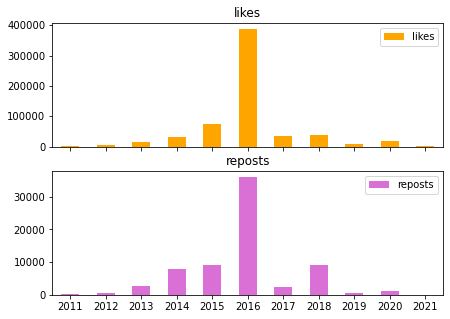

In [29]:
# Vẽ biểu đồ cho Like và Repost
df = pd.DataFrame({'likes': like,
                   'reposts': repost}, index=res_df.index.values)
ax = df.plot.bar(subplots = True,rot=0, color = {"reposts": "orchid", "likes": "orange"},figsize=(7,5))

Lượng like và repost đều có giá trị lớn nhất vào năm 2016.

#### Gộp hai biểu đồ lại để trực quan hơn:

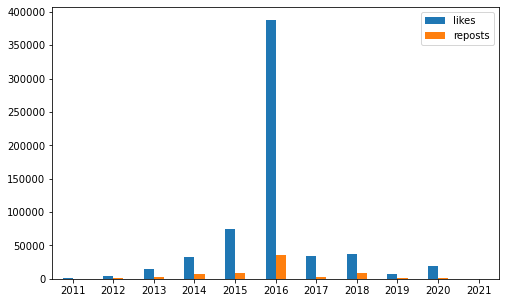

In [30]:
ax = df.plot.bar(rot = 0, figsize=(8, 5))

#### Nhận xét: 
- Chênh lệch lớn giữa số lượng like và repost.
- Số lượng repost Playlist hầu như tỉ lệ thuận với số lượng like Playlist --> Người dùng có xu hướng repost Playlist về trang cá nhân của họ sau khi like Playlist đó.
- Vào năm 2017, số lượng like và repost trên Souncloud giảm mạnh, tăng lên vào 2018 nhưng không đáng kể và kể từ năm 2019 lại giảm rõ rệt. Có thể người dùng đã tìm được nền tảng đem đến trải nghiệm tốt hơn và dần dần giảm thời gian sử dụng sử dụng SoundCloud.

## KẾT LUẬN:

Qua 3 phần phân tích dữ liệu với 3 File dữ liệu Users, Tracks, Playlists, ta đã phát hiện và đưa ra nhận xét được nhiều điều thú vị xoay quanh những dữ liệu này:
- Biết được hoạt động của người dùng đang chủ yếu hướng tới là làm gì khi sử dụng, tương tác trên trang web, ứng dụng.
- Nhận thấy rõ được sự quan tâm của người dùng đối với các thể loại nhạc và xu hướng qua từng năm.
- Thể hiện tương đối thông tin phủ sóng người dùng sử dụng web, ứng dụng đến từ châu lục và quốc gia nào.

Nhân viên phân tích dữ liệu có thể rút ra được những nhận xét, kết luận này lên bộ phận công ty và thay đổi chiến lược phát triển, marketing của công ty cho phù hợp với mục tiêu, kế hoạch phát triển của họ.

## NHÌN LẠI QUÁ TRÌNH LÀM ĐỒ ÁN:

- Có nhiều sai sót, trục trặc trong quá trình làm từng phần nhưng cuối cùng cũng sửa được nhờ sự giúp đỡ, phối hợp của cả 2 người.
- Phát hiện trong quá trình thực hiện Collect data đã làm cho mình càng ngày say mê ngành KHDL này và tiếp tục thử nghiệm trên nhiều trang web khác.
- Visualize, phân tích các data tự mình Collect được và rút ra được những kết luận thú vị khi ở vị trí là một Data Scientist của một công ty cần khám phá dữ liệu. Nó sinh động và lôi cuốn mình vào thế giới đẹp đẽ của dữ liệu.
- Qua những góp ý chân thành của các bạn nhóm 03, nhóm đã rút ra được nhiều điều hay và chỉnh sửa bài làm của mình một cách chỉn chủ và gọn gàng, đúng yêu cầu, đúng trọng tâm để làm cho bài làm của nhóm ngày càng hoàn hảo hơn.
- Đồ án này đã giúp cho chúng em có một cái nhìn tổng quan nhất khi phân tích dữ liệu và thu thập dữ liệu và nhận ra những sai sót, khuyết điểm trong cách suy nghĩ và đặt câu hỏi tập trung vào vấn đề, chọn lựa tập dữ liệu đầy đủ, chính xácđể phân tích.

## TÀI LIỆU THAM KHẢO:


- Document của các thư viện Pandas, Numpy, BeautifulSoup, Matplotlb, ...
- Trang Youtube hướng dẫn sử dụng Beautiful Soup
- Nhóm có tham khảo về địa chỉ API của SoundCloud từ các anh/chị TA. 

                                            --- HẾT ---